# Consumo de Energía Mensual de Hogares
Este notebook demuestra cómo analizar los datos simulados del archivo
**`consumo_energia.xlsx`** usando Python y Pandas.

Autor: *PAULA ANDREA TERRIOS OSSA*  
Materia: *Ciencia de Datos*



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


**Lectura del archivo Excel**

In [2]:
archivo_excel = "consumo_energia.xlsx"
datos = pd.read_excel(archivo_excel, sheet_name=None)

print("Hojas en el archivo Excel:")
print(datos.keys())

hogar_A = datos["Hogar_A"]
hogar_B = datos["Hogar_B"]
hogar_C = datos["Hogar_C"]
promedios = datos["Promedios"]
costos = datos["Costos"]
resumen = datos["Resumen_Anual"]

Hojas en el archivo Excel:
dict_keys(['Hogar_A', 'Hogar_B', 'Hogar_C', 'Promedios', 'Costos', 'Resumen_Anual'])


**Procesamiento de datos**

In [3]:
consumo_df = pd.DataFrame({
    "Mes": hogar_A["Mes"],
    "Hogar A": hogar_A["Consumo_kWh"],
    "Hogar B": hogar_B["Consumo_kWh"],
    "Hogar C": hogar_C["Consumo_kWh"]
})

consumo_df["Promedio_kWh"] = consumo_df[["Hogar A", "Hogar B", "Hogar C"]].mean(axis=1)

print("\n🔹 Resumen del consumo mensual:")
print(consumo_df.head())



🔹 Resumen del consumo mensual:
       Mes  Hogar A  Hogar B  Hogar C  Promedio_kWh
0    Enero      239      266      162    222.333333
1  Febrero      256      273      182    237.000000
2    Marzo      198      245      258    233.666667
3    Abril      206      243      170    206.333333
4     Mayo      234      240      261    245.000000


**Estadísticas básicas**

In [4]:
print("\n📊 Estadísticas generales:")
print(consumo_df.describe())

totales = {
    "Hogar A": hogar_A["Consumo_kWh"].sum(),
    "Hogar B": hogar_B["Consumo_kWh"].sum(),
    "Hogar C": hogar_C["Consumo_kWh"].sum()
}

print("\n⚡ Consumo total anual por hogar:")
print(totales)



📊 Estadísticas generales:
          Hogar A     Hogar B  Hogar C  Promedio_kWh
count   12.000000   12.000000   12.000     12.000000
mean   232.666667  249.333333  207.750    229.916667
std     18.267374   19.462474   40.193     11.877425
min    198.000000  211.000000  162.000    206.333333
25%    225.750000  242.250000  175.250    222.083333
50%    235.500000  248.000000  197.500    232.666667
75%    240.750000  260.000000  251.750    237.500000
max    258.000000  280.000000  261.000    247.000000

⚡ Consumo total anual por hogar:
{'Hogar A': np.int64(2792), 'Hogar B': np.int64(2992), 'Hogar C': np.int64(2493)}


**Visualizaciones**

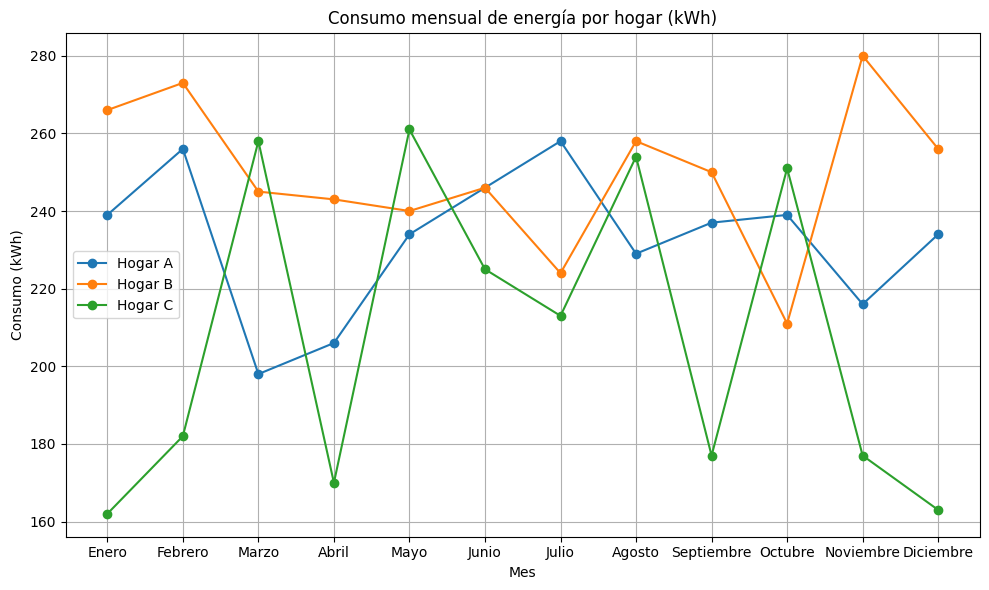

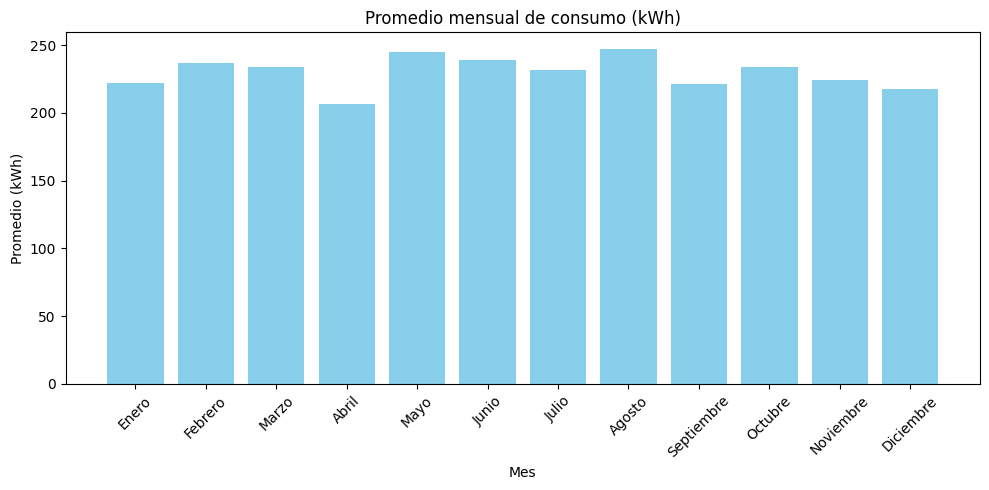

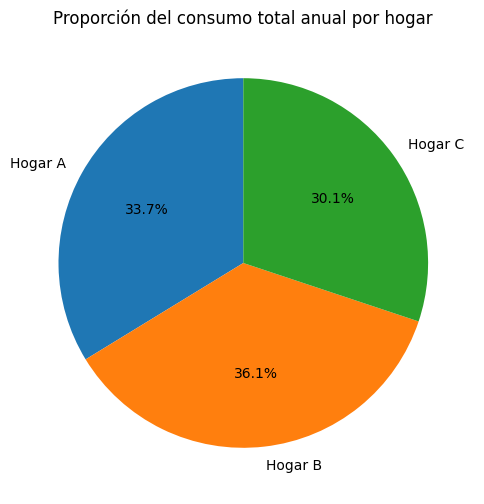

In [5]:
plt.figure(figsize=(10,6))
plt.plot(consumo_df["Mes"], consumo_df["Hogar A"], marker='o', label="Hogar A")
plt.plot(consumo_df["Mes"], consumo_df["Hogar B"], marker='o', label="Hogar B")
plt.plot(consumo_df["Mes"], consumo_df["Hogar C"], marker='o', label="Hogar C")
plt.title("Consumo mensual de energía por hogar (kWh)")
plt.xlabel("Mes")
plt.ylabel("Consumo (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.bar(consumo_df["Mes"], consumo_df["Promedio_kWh"], color='skyblue')
plt.title("Promedio mensual de consumo (kWh)")
plt.xlabel("Mes")
plt.ylabel("Promedio (kWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.pie(totales.values(), labels=totales.keys(), autopct="%1.1f%%", startangle=90)
plt.title("Proporción del consumo total anual por hogar")
plt.show()


**Conclusiones**

In [6]:
hogar_max = max(totales, key=totales.get)
print(f"\n🏠 El hogar con mayor consumo anual es: {hogar_max}")

mes_mayor_promedio = consumo_df.loc[consumo_df["Promedio_kWh"].idxmax(), "Mes"]
print(f"📅 El mes con mayor consumo promedio fue: {mes_mayor_promedio}")

print("\n✅ Análisis completado correctamente.")



🏠 El hogar con mayor consumo anual es: Hogar B
📅 El mes con mayor consumo promedio fue: Agosto

✅ Análisis completado correctamente.
